# SAT Participation Improvement

#### Importing Necessary Libraries 

In [1]:
# EDA/Data Cleaning
import pandas as pd
import numpy as np
import seaborn as sns

# Visualization
from matplotlib import pyplot as plt

# Setting style
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Step 1: Loading the data and performing basic operations
#### _Loading the data in using pandas_

In [2]:
# Setting index_col = 0 to prevent duplicate indexing column

act = pd.read_csv('./act.csv',index_col=0)
sat = pd.read_csv('./sat.csv',index_col=0)

#### _Printing the first ten rows of each dataframe_

In [3]:
act.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [4]:
sat.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


#### _Checking for null values aka completedness of data_
- Data looks complete (no missing values). However, a major difference is noticed when inspecting the number of observations. The ACT dataframe includes a row detailing national data, while the SAT dataframe does not. 

In [5]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.4+ KB


In [6]:
act.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), object(2)
memory usage: 3.2+ KB


#### _Inspecting datatypes_
- Data types reveal how infotmation is embedded into each column of a dataframe and can take the form of integer, float, object, etc. to name a few. 

In [7]:
sat.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [8]:
act.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### _Converting datatypes_
- Because our data is numerical and ACT data contains integers beyond the decimal point, the Participation column will need to be reassigned as a float, shown below:

In [9]:
# str.strip used to remove the percentage symbol 

sat['Participation'] = sat['Participation'].str.strip('%').astype('float') / 100.0  
act['Participation'] = act['Participation'].str.strip('%').astype('float') / 100.0

In [10]:
sat.head(1)  # Inspecting progress

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.05,593,572,1165


In [11]:
act.head(2)  # Inspecting progress

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.6,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.0,18.9,18.4,19.7,19.4,19.2


#### _Merging dataframes on the State column_
- In order to properly analyze data on a State level, both dataframes must be combined. This can be accomplished using Pandas and perfoming an inner join and specifying the State column.

In [12]:
merged = pd.merge(sat, act, how='inner', on='State')

In [14]:
merged.head(2)  # Inspecting progress

,State,Participation_x,Evidence-Based Reading and Writing,Math_x,Total,Participation_y,English,Math_y,Reading,Science,Composite
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8


#### _Renaming columns_
- To distinguish between the SAT and ACT columns, utilize the .rename feature, greatly improving the readability of the merged dataframe 

In [15]:
merged = merged.rename(columns={'Participation_x':'SAT Participation',  
                               'Evidence-Based Reading and Writing':'SAT Verbal',
                               'Math_x':'SAT Math',
                               'Total' : 'SAT Total',
                               'Participation_y':'ACT Participation',
                               'English':'ACT English',
                               'Math_y':'ACT Math',
                               'Reading':'ACT Reading', 
                               'Science':'ACT Science',
                               'Composite':'ACT Total'
                          })

In [16]:
merged.head(20)  # Inspecting progress

,State,SAT Participation,SAT Verbal,SAT Math,SAT Total,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Total
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8
5,Colorado,0.11,606,595,1201,1.00,20.1,20.3,21.2,20.9,20.8
6,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,25.2
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1
8,District of Columbia,1.00,482,468,950,0.32,24.4,23.5,24.9,23.5,24.2
9,Florida,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,19.8


## Step 2: Exploratory Data Analysis
#### _Utilizing MatPlotLib and Seaborn to plot distributions for the ACT/SAT using histograms_


### Pairplot
- To visualize all relationships in dataset

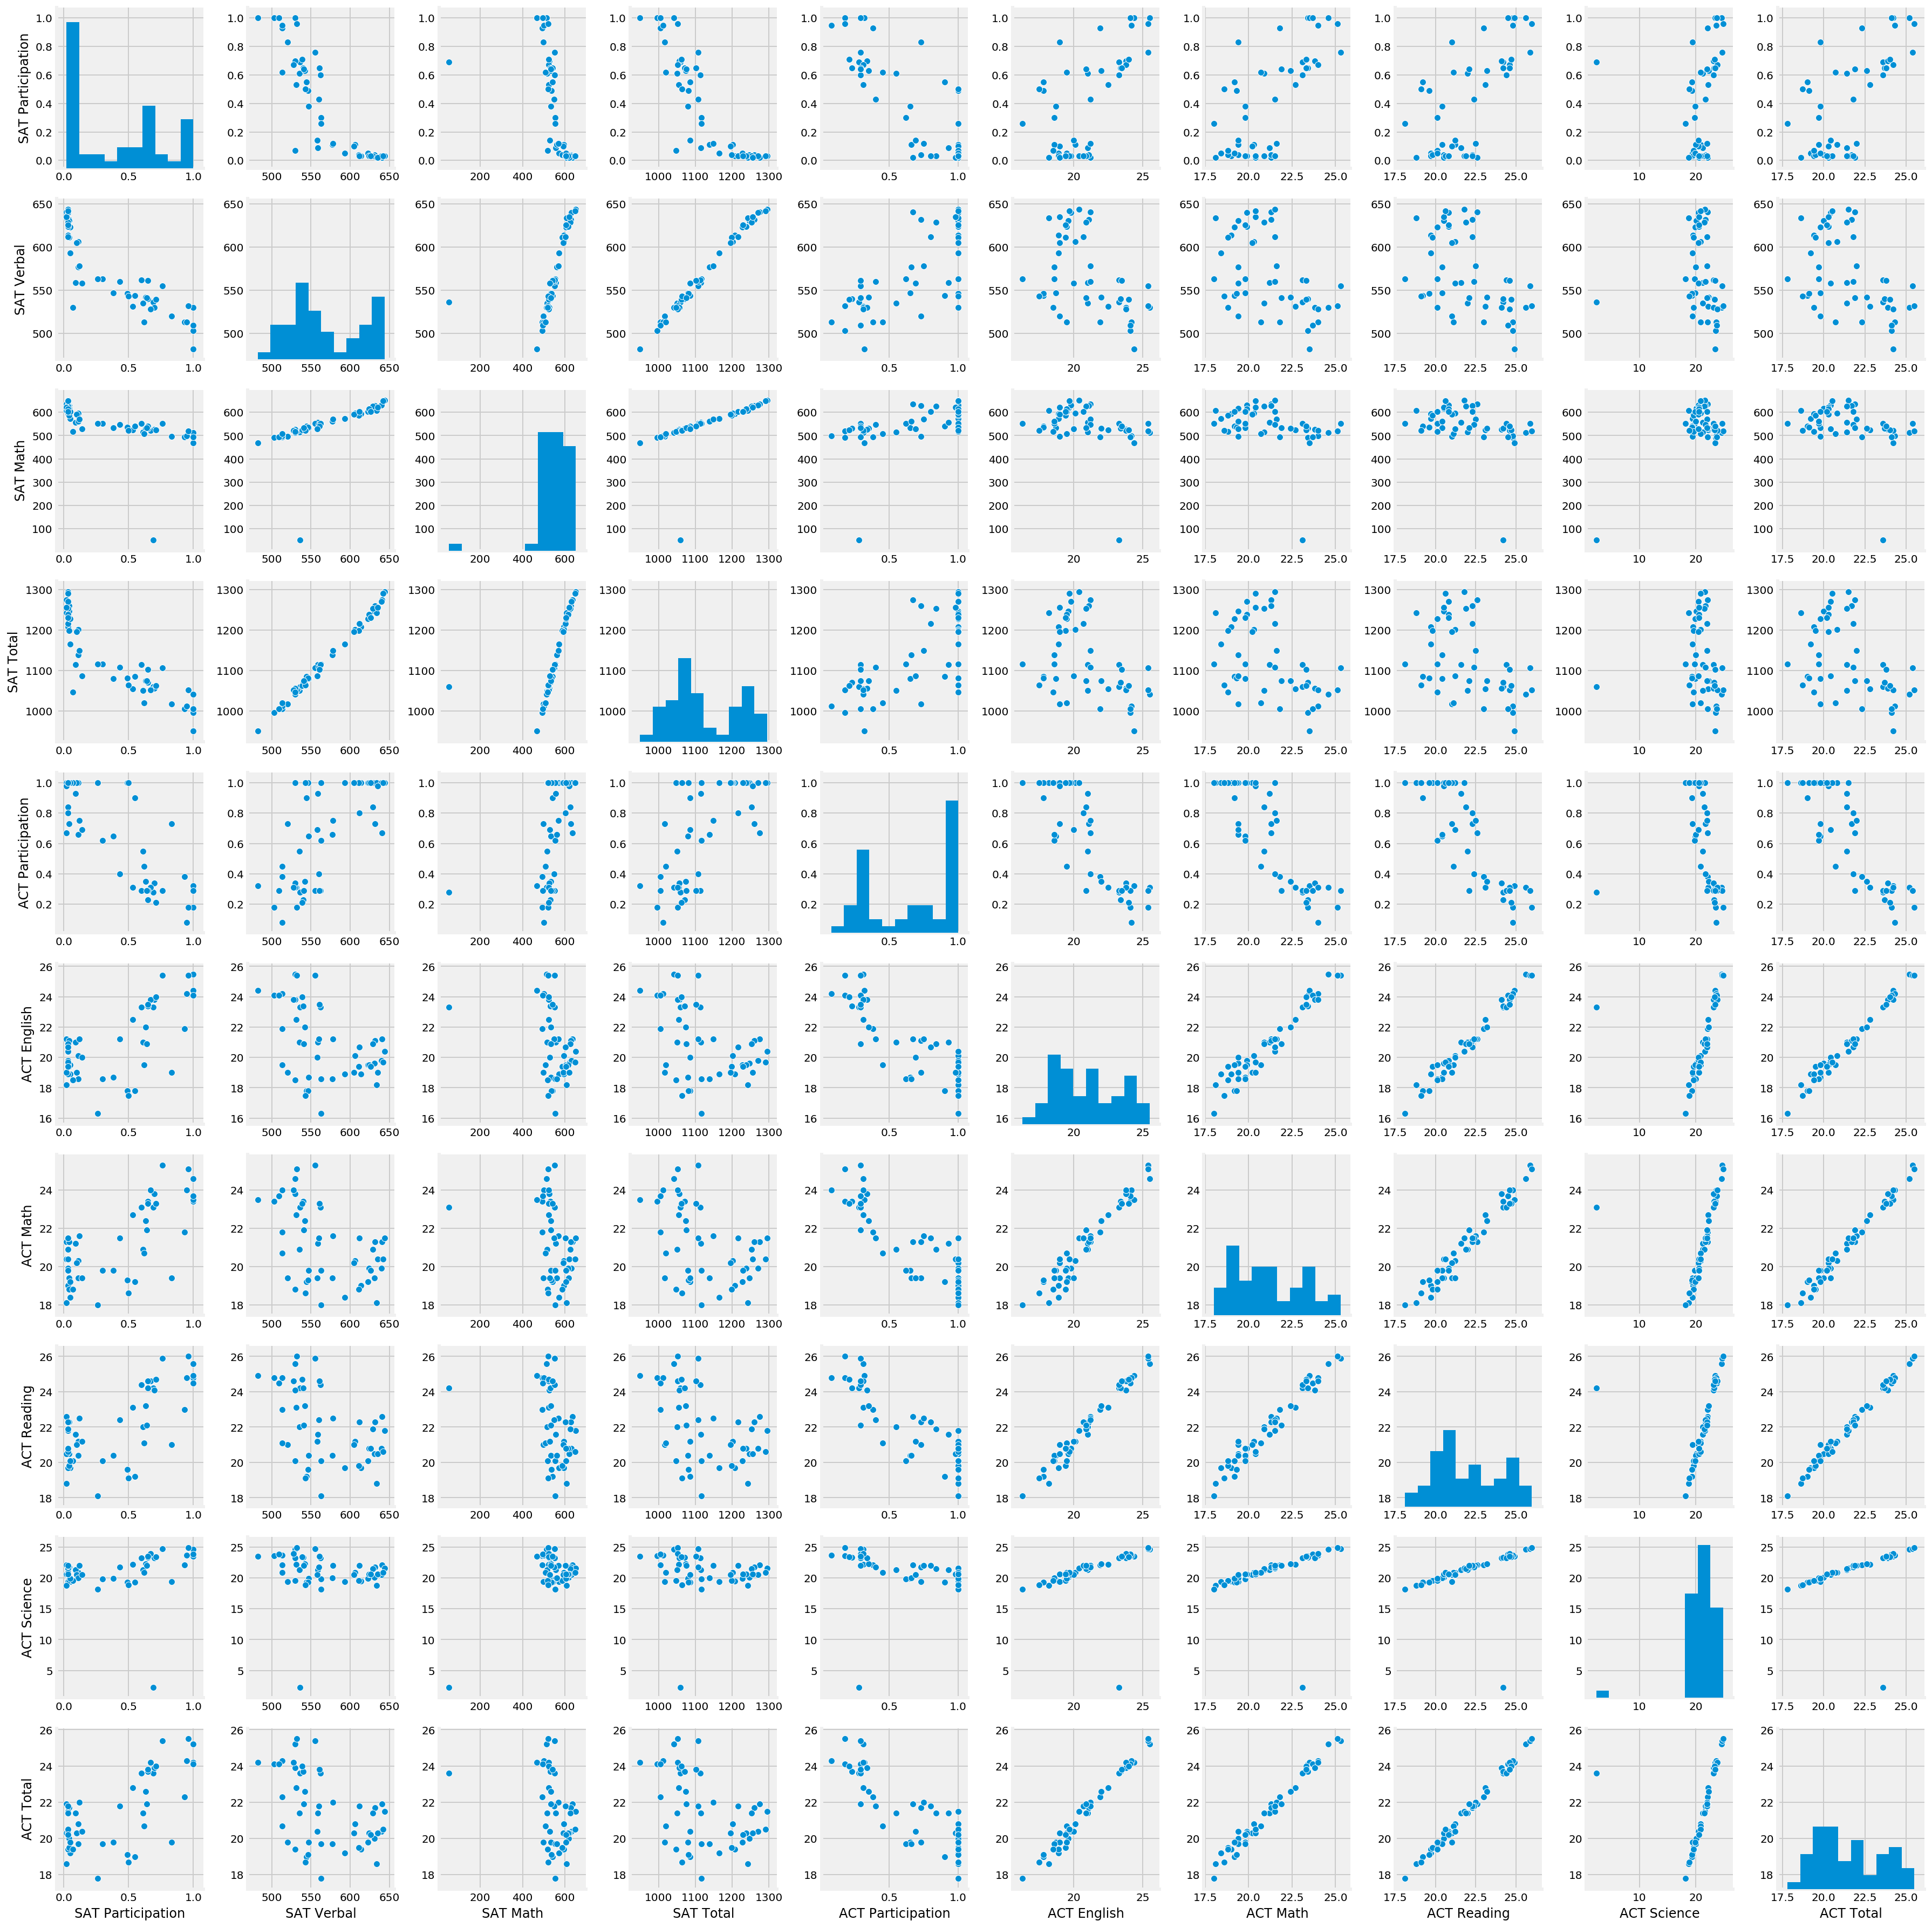

In [17]:
sns.pairplot(merged)

### Histograms
#### _Partcipation Rates_

Text(0,0.5,'Frequency')

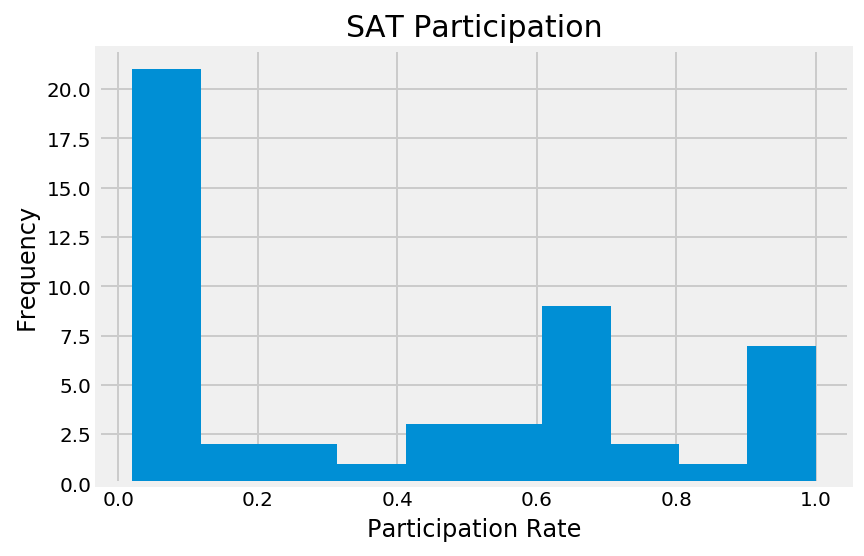

In [18]:
# SAT 
plt.hist(merged['SAT Participation'],bins=10)
plt.title('SAT Participation',fontsize=15)
plt.xlabel('Participation Rate',fontsize=12)
plt.ylabel('Frequency',fontsize=12)

Text(0,0.5,'Frequency')

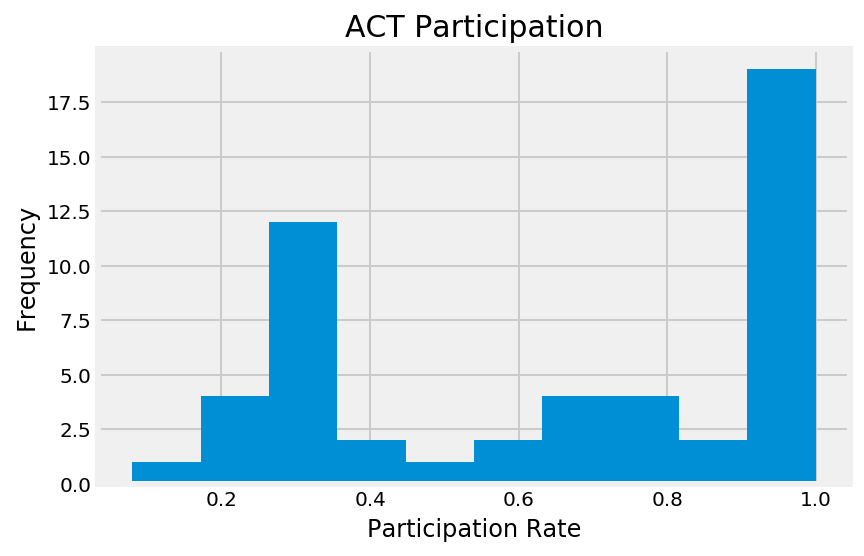

In [19]:
# ACT
plt.hist(merged['ACT Participation'],bins=10)
plt.title('ACT Participation',fontsize=15)
plt.xlabel('Participation Rate',fontsize=12)
plt.ylabel('Frequency',fontsize=12)

### Scatter Plots
- Visualize the relationship between two variables relate to each other, referred to as correlation, which can be : positive, negative, and none (no correlation). 
    - Positive Correlation: as one variable increases so does the other
    - Negative Correlation: as one variable increases the other decreases
- Each scatter plot below reveals negative correlation.
    - First, as participation rates for one test increase, participation rates for the other descrease.
    - Also, as participation rates for either test increase, average scores decrease
#### _Partcipation Rates_

Text(0,0.5,'ACT Participation')

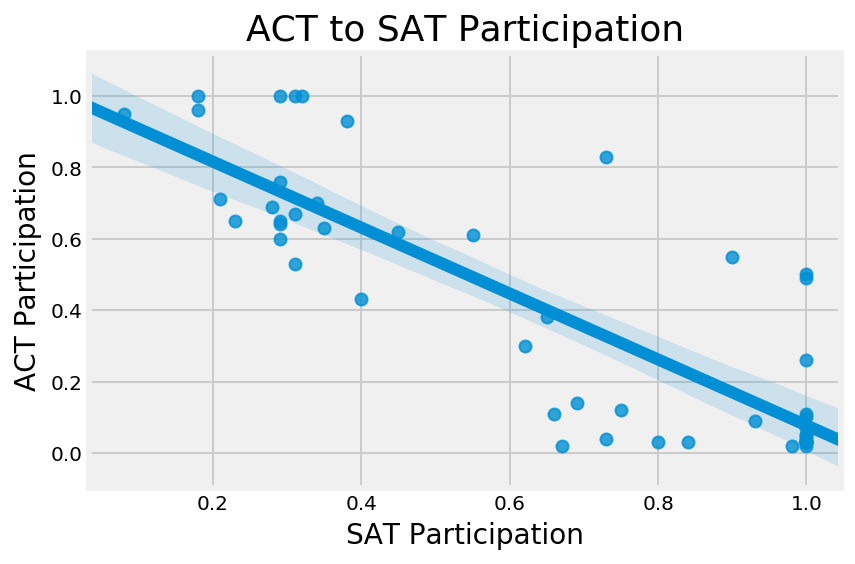

In [20]:
sns.regplot(x = 'ACT Participation',
            y = 'SAT Participation',
            data= merged)
plt.title('ACT to SAT Participation',fontsize=18)
plt.xlabel('SAT Participation',fontsize=14)
plt.ylabel('ACT Participation',fontsize=14)

#### _SAT Scores_

(900, 1300)

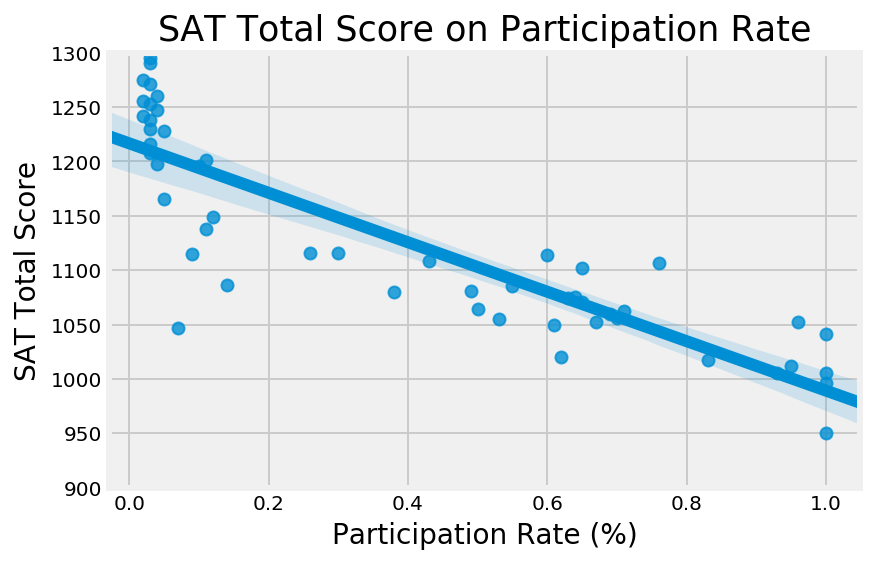

In [21]:
sns.regplot(x = merged['SAT Participation'], y = merged['SAT Total'])
plt.title('SAT Total Score on Participation Rate',fontsize=17.5)
plt.xlabel('Participation Rate (%)',fontsize=14)
plt.ylabel('SAT Total Score',fontsize=14)
plt.ylim(900,1300)

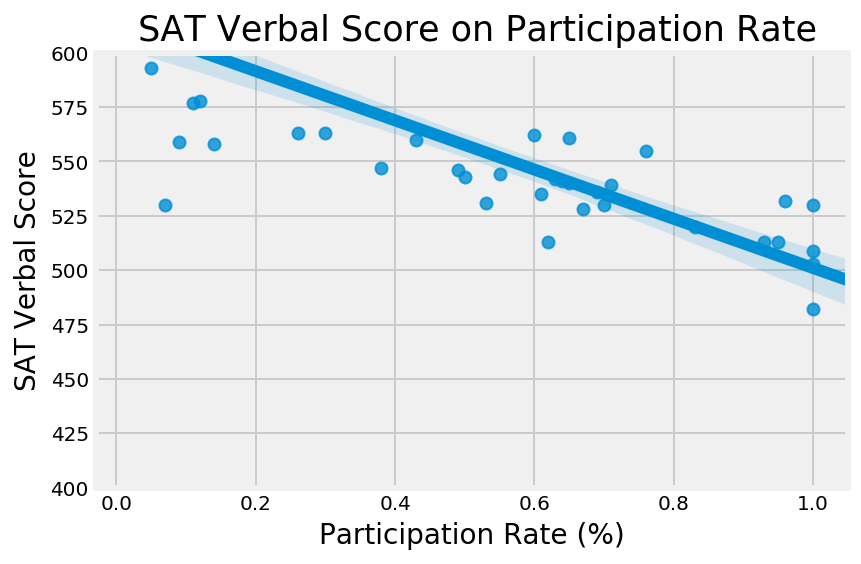

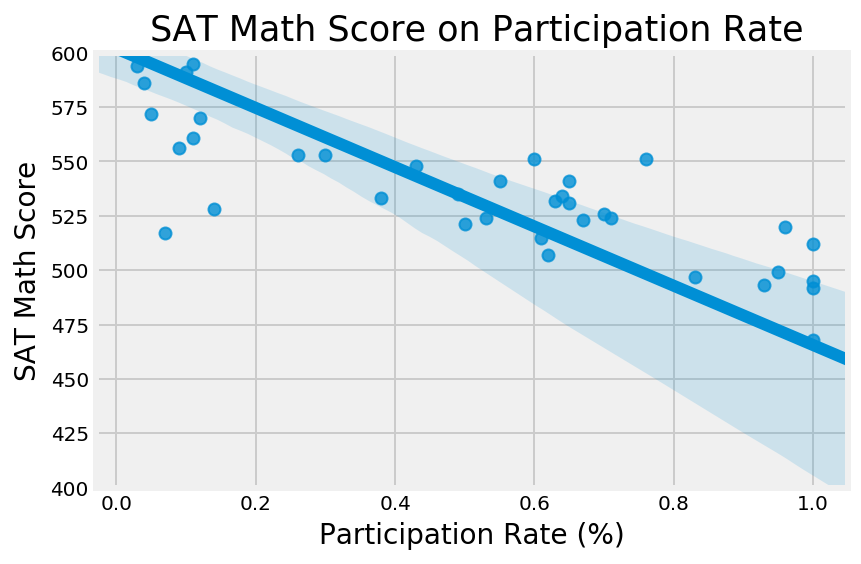

In [22]:
SAT_columns = ['SAT Verbal', 'SAT Math']

for i in SAT_columns:
    sns.regplot(x = merged['SAT Participation'], y = merged[i])
    plt.title(f' {i} Score on Participation Rate',fontsize=17.5)
    plt.xlabel('Participation Rate (%)',fontsize=14)
    plt.ylabel(f'{i} Score',fontsize=14)
    plt.ylim(400,600)
    plt.show();
    print

#### _ACT Scores_

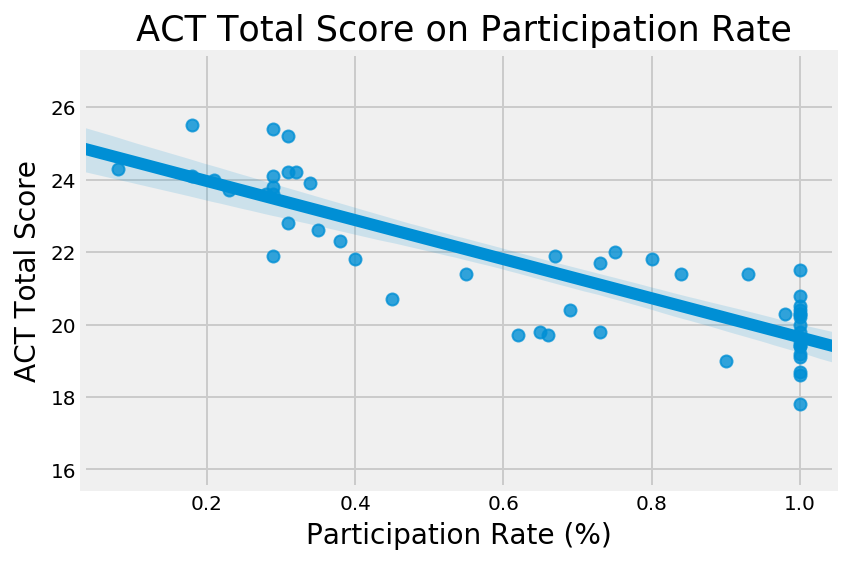

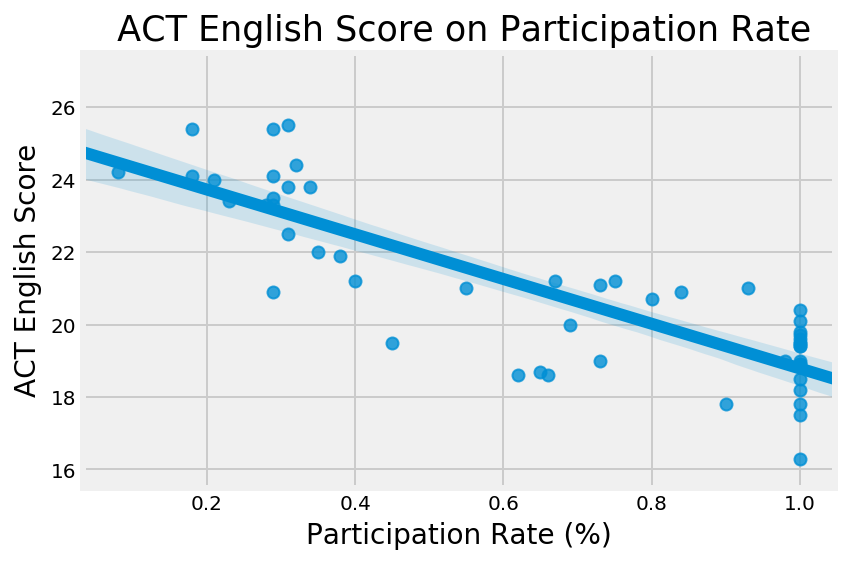

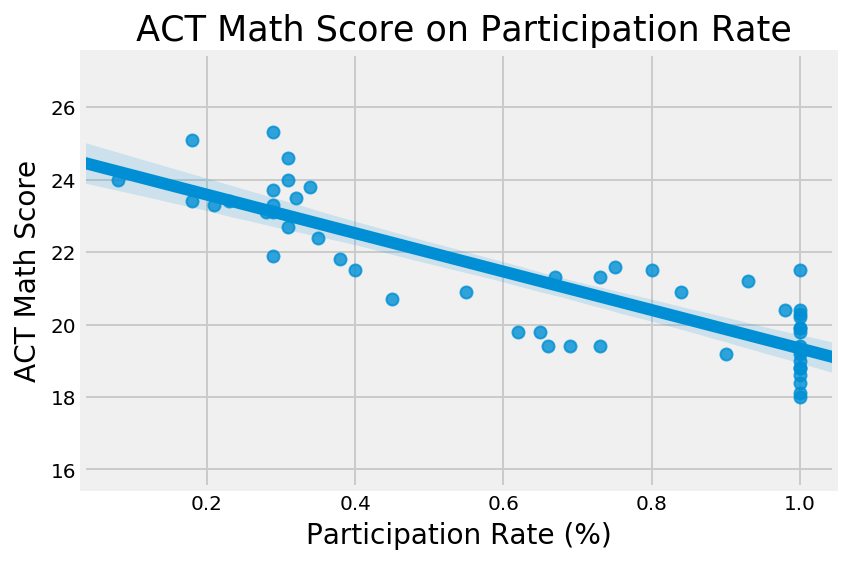

In [23]:
ACT_columns = ['ACT Total', 'ACT English', 'ACT Math']

for i in ACT_columns:
    sns.regplot(x = merged['ACT Participation'], y = merged[i])
    plt.title(f' {i} Score on Participation Rate',fontsize=17.5)
    plt.xlabel('Participation Rate (%)',fontsize=14)
    plt.ylabel(f'{i} Score',fontsize=14)
    plt.ylim(15.5,27.5)
    plt.show();
    print

#### _SAT- States w/Lowest Participation_
- Use for further analysis coupled with information from PrepScholar 

In [24]:
merged.sort_values('SAT Participation').head(20)

,State,SAT Participation,SAT Verbal,SAT Math,SAT Total,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Total
34,North Dakota,0.02,635,621,1256,0.98,19.0,20.4,20.5,20.6,20.3
24,Mississippi,0.02,634,607,1242,1.00,18.2,18.1,18.8,18.8,18.6
15,Iowa,0.02,641,635,1275,0.67,21.2,21.3,22.6,22.1,21.9
25,Missouri,0.03,640,631,1271,1.00,19.8,19.9,20.8,20.5,20.4
44,Utah,0.03,624,614,1238,1.00,19.5,19.9,20.8,20.6,20.3
41,South Dakota,0.03,612,603,1216,0.80,20.7,21.5,22.3,22.0,21.8
27,Nebraska,0.03,629,625,1253,0.84,20.9,20.9,21.9,21.5,21.4
49,Wisconsin,0.03,642,649,1291,1.00,19.7,20.4,20.6,20.9,20.5
23,Minnesota,0.03,644,651,1295,1.00,20.4,21.5,21.8,21.6,21.5
50,Wyoming,0.03,626,604,1230,1.00,19.4,19.8,20.8,20.6,20.2
